# Ablation Study Results

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
results_dir = '../../results/ablation_study'

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'medium'


def fix_model_name_for_plotting(name):
    model_name = name.split('VarValueClassifierRNN__')[1]
    if model_name == 'all':
        return 'all'
    else:
        model_name = f"No {model_name.split('no')[1]}"
        return model_name


def read_results(results_dir):
    all_json_files = Path(results_dir).rglob('*.json')
    all_data = []
    for fl in all_json_files:
        d = pd.read_json(fl)
        d.index = np.arange(1, len(d) + 1)
        all_data.append(d)
    combined_results = pd.concat(all_data)
    combined_results['Model'] = combined_results['model_name'].apply(fix_model_name_for_plotting)
    combined_results.drop(columns=['model_name','run_on'], inplace=True)
    return combined_results

combined_results = read_results(results_dir=results_dir)
combined_results

,precision,recall,accuracy,fscore,time_taken,Model
1,0.894158,0.809995,0.857051,0.849998,193.233349,No Length
2,0.919675,0.816174,0.872439,0.864839,172.959698,No Length
3,0.927559,0.823974,0.879806,0.872704,176.037462,No Length
4,0.935206,0.825494,0.884145,0.876931,164.450960,No Length
5,0.936994,0.832958,0.888469,0.881918,180.087371,No Length
...,...,...,...,...,...,...
11,0.794519,0.665763,0.746779,0.724464,182.719288,No Value
12,0.770648,0.690551,0.742506,0.728404,181.655235,No Value
13,0.798658,0.639792,0.739238,0.710452,180.738117,No Value
14,0.809217,0.629676,0.740599,0.708246,179.274716,No Value


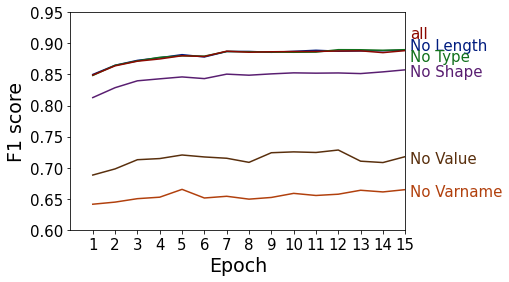

In [2]:
def plot_ablation_study_results(combined_results):
    fig, ax = plt.subplots(1, 1)
    fscores_by_model = combined_results[['Model', 'fscore']].groupby(['Model']).agg(list).to_dict()['fscore']
    sns.set_palette("dark")

    ax = sns.lineplot(data=combined_results.reset_index(), y='fscore', x=combined_results.index, hue='Model', legend=False)
    ax.set(xlabel="Epoch", ylabel='F1 score')
    text_font_size = 15

    ax.text(15.2, fscores_by_model['all'][-1] + 0.02, 'all', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[3])  #
    ax.text(15.2, fscores_by_model['No Var'][-1] - 0.01, 'No Varname', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[1])  #
    ax.text(15.2, fscores_by_model['No Length'][-1], 'No Length', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[0])  #
    ax.text(15.2, fscores_by_model['No Shape'][-1] - 0.01, 'No Shape', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[4])  #
    ax.text(15.2, fscores_by_model['No Type'][-1] - 0.019, 'No Type', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[2])
    ax.text(15.2, fscores_by_model['No Value'][-1] - 0.01, 'No Value', fontsize=text_font_size, fontweight='normal',
            color=sns.color_palette()[5])

    ax.xaxis.label.set_size(19)
    ax.yaxis.label.set_size(19)
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    ax.set_xlim(0, 15)
    ax.set_ylim(0.6, .95)
    # plt.savefig(f'{results_dir}/plots/ablation_study_results.pdf', transparent=True,
    #             bbox_inches='tight')
    plt.show()

plot_ablation_study_results(combined_results)